###Summary of the Notebook - Topic Modeling: Latent Dirichlet Allocation (LDA) vs. Non-Negative Matrix Factorization (NMF)
Project Objective
The goal of this notebook is to apply topic modeling to identify patterns in news articles published by the U.S. Department of Justice between 2009 and 2018. Two popular methods were used for this purpose:

Latent Dirichlet Allocation (LDA) – a probabilistic model based on Dirichlet distributions, assuming that each document is a mixture of topics and each topic is a distribution of words.
Non-Negative Matrix Factorization (NMF) – a linear algebra-based method that decomposes the term-document matrix into two smaller matrices, revealing latent patterns without assuming probabilistic distributions.
The objective is to compare these two methods and analyze how each one identifies the main themes in the news articles.

Notebook Steps
1. Data Import
The dataset was loaded from Kaggle and contains thousands of press releases from the Department of Justice.
The structure of the news articles was inspected for inconsistencies and potential preprocessing needs.
2. Data Preprocessing
Natural Language Processing (NLP) techniques were applied to clean and prepare the text for topic modeling:

Tokenization and stopword removal – common words were removed to reduce noise.
Lemmatization – words were reduced to their base form for better topic grouping.
Vectorization – the text was transformed into a numerical matrix using TF-IDF (Term Frequency-Inverse Document Frequency), which assigns importance scores to words in each document.
3. Topic Modeling with LDA
An LDA model was trained to identify 10 topic clusters in the news articles.
The most representative words for each topic were extracted, allowing for the interpretation of each cluster’s theme.
4. Topic Modeling with NMF
The same process was repeated using NMF, which also extracted 10 topics along with their associated keywords.
The results were compared to those from LDA to analyze differences in topic detection.
5. Interpretation of Results
Each cluster was analyzed and categorized into themes such as national security, financial crimes, drug trafficking, corruption, and civil rights violations.
LDA provided more interpretable results in some cases, while NMF identified more specific patterns in financial and legal topics.
Both methods performed well, but the choice of the best approach depends on the application context.
Conclusion
LDA demonstrated better semantic coherence in broad topics, making it effective for grouping general themes such as "national security" or "financial crimes."
NMF excelled at identifying more specific categories, making it useful for detailed topic analysis within each theme.
The study suggests that combining both methods can provide a richer and deeper analysis of the topics covered in the Department of Justice news articles.

In [2]:
import pandas as pd
import numpy as np
import tarfile
import os
import kagglehub

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jbencina/department-of-justice-20092018-press-releases")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\caioe\.cache\kagglehub\datasets\jbencina\department-of-justice-20092018-press-releases\versions\1


In [ ]:


files = os.listdir(path)  

print("Files in the directory", files)


Files in the directory ['combined.json']


In [5]:
df = pd.read_json(path + "/combined.json", lines=True)



EDA

In [6]:
df.head()

,id,title,contents,date,topics,components
0,None,Convicted Bomb Plotter Sentenced to 30 Years,"PORTLAND, Oregon. – Mohamed Osman Mohamud, 23,...",2014-10-01T00:00:00-04:00,[],[National Security Division (NSD)]
1,12-919,$1 Million in Restitution Payments Announced t...,WASHINGTON – North Carolina’s Waccamaw River...,2012-07-25T00:00:00-04:00,[],[Environment and Natural Resources Division]
2,11-1002,$1 Million Settlement Reached for Natural Reso...,BOSTON– A $1-million settlement has been...,2011-08-03T00:00:00-04:00,[],[Environment and Natural Resources Division]
3,10-015,10 Las Vegas Men Indicted \r\nfor Falsifying V...,WASHINGTON—A federal grand jury in Las Vegas...,2010-01-08T00:00:00-05:00,[],[Environment and Natural Resources Division]
4,18-898,$100 Million Settlement Will Speed Cleanup Wor...,"The U.S. Department of Justice, the U.S. Envir...",2018-07-09T00:00:00-04:00,[Environment],[Environment and Natural Resources Division]


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13087 entries, 0 to 13086
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          12810 non-null  object
 1   title       13087 non-null  object
 2   contents    13087 non-null  object
 3   date        13087 non-null  object
 4   topics      13087 non-null  object
 5   components  13087 non-null  object
dtypes: object(6)
memory usage: 613.6+ KB


In [8]:
df['contents'].isnull().sum()

0

So, let's try

In [9]:
df2 = df[['contents']]  

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13087 entries, 0 to 13086
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   contents  13087 non-null  object
dtypes: object(1)
memory usage: 102.4+ KB


## Preprocessing

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
cv = CountVectorizer(max_df=0.95, min_df=5, max_features = 5000, ngram_range=(1,2), stop_words='english')

In [13]:
dtm = cv.fit_transform(df2['contents'])

## LDA

In [14]:
from sklearn.decomposition import LatentDirichletAllocation

In [15]:
LDA = LatentDirichletAllocation(n_components=10,random_state=42)

In [16]:
LDA.fit(dtm)

LatentDirichletAllocation(random_state=42)

In [17]:
for index,topic in enumerate(LDA.components_):
    print(f'THE TOP 20 WORDS FOR TOPIC #{index}')
    print([cv.get_feature_names_out()[i] for i in topic.argsort()[-20:]])

    print('\n')

THE TOP 20 WORDS FOR TOPIC #0
['today', 'division', 'national security', 'law', 'foreign', 'department', 'office', 'said', 'national', 'new york', 'york', 'district', 'assistant', 'fbi', 'security', 'new', 'states', 'united states', 'united', 'attorney']


THE TOP 20 WORDS FOR TOPIC #1
['scheme', 'count', 'trial', 'conspiracy', 'assistant attorney', 'general', 'pleaded guilty', 'pleaded', 'financial', 'office', 'department', 'case', 'assistant', 'guilty', 'criminal division', 'division', 'district', 'attorney', 'fraud', 'criminal']


THE TOP 20 WORDS FOR TOPIC #2
['assistant attorney', 'case', 'prison', 'indictment', 'assistant', 'said', 'investigation', 'today', 'office', 'fbi', 'guilty', 'federal', 'civil rights', 'district', 'civil', 'justice', 'rights', 'department', 'division', 'attorney']


THE TOP 20 WORDS FOR TOPIC #3
['health care', 'said', 'united states', 'false claims', 'united', 'act', 'office', 'settlement', 'states', 'false', 'services', 'civil', 'attorney', 'justice', '

In [18]:
topic_results = LDA.transform(dtm)

In [19]:
df2['Topic_LDA'] = topic_results.argmax(axis=1)

C:\Users\caioe\AppData\Local\Temp\ipykernel_100916\4274376537.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Topic_LDA'] = topic_results.argmax(axis=1)


## NMF

In [20]:
from sklearn.decomposition import NMF

In [21]:
tfidf = TfidfVectorizer(max_df=0.95, min_df=5, max_features = 5000, ngram_range=(1,2), stop_words='english')

In [22]:
dtm = tfidf.fit_transform(df2['contents'])

In [23]:
nmf_model = NMF(n_components=10,random_state=42)

In [24]:
nmf_model.fit(dtm)

NMF(n_components=10, random_state=42)

In [25]:
for index,topic in enumerate(nmf_model.components_):
    print(f'THE TOP 20 WORDS FOR TOPIC #{index}')
    print([cv.get_feature_names_out()[i] for i in topic.argsort()[-20:]])

    print('\n')

THE TOP 20 WORDS FOR TOPIC #0
['conspiracy', 'gang', 'prison', 'united', 'defendants', 'new', 'law enforcement', 'assistant', 'criminal division', 'case', 'security', 'police', 'office', 'law', 'guilty', 'fbi', 'criminal', 'district', 'indictment', 'attorney']


THE TOP 20 WORDS FOR TOPIC #1
['years', 'internal revenue', 'department tax', 'prison', 'revenue', 'criminal investigation', 'division', 'irs criminal', 'refunds', 'bank', 'income tax', 'taxes', 'attorney', 'false', 'tax returns', 'returns', 'income', 'tax division', 'irs', 'tax']


THE TOP 20 WORDS FOR TOPIC #2
['fraud section', 'billed', 'fraudulent', 'beneficiaries', 'fraud strike', 'home', 'strike', 'strike force', 'medicare fraud', 'care fraud', 'hhs oig', 'services', 'oig', 'home health', 'health care', 'care', 'hhs', 'fraud', 'health', 'medicare']


THE TOP 20 WORDS FOR TOPIC #3
['race', 'agreement', 'hud', 'county', 'justice department', 'housing act', 'act', 'voting', 'justice', 'fair', 'department', 'fair housing', 'd

In [26]:
topic_results = nmf_model.transform(dtm)

In [27]:
df2['Topic_NMF'] = topic_results.argmax(axis=1)

C:\Users\caioe\AppData\Local\Temp\ipykernel_100916\613081281.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Topic_NMF'] = topic_results.argmax(axis=1)


In [28]:
df2

,contents,Topic_LDA,Topic_NMF
0,"PORTLAND, Oregon. – Mohamed Osman Mohamud, 23,...",0,0
1,WASHINGTON – North Carolina’s Waccamaw River...,4,9
2,BOSTON– A $1-million settlement has been...,4,9
3,WASHINGTON—A federal grand jury in Las Vegas...,4,9
4,"The U.S. Department of Justice, the U.S. Envir...",4,9
...,...,...,...
13082,The Department of Justice and the U.S. Environ...,4,9
13083,The Justice Department announced that Zarein...,0,0
13084,Subsidiary Agrees to Plead Guilty to Violating...,1,9
13085,ZTE Corporation has agreed to enter a guilty p...,4,0


In [29]:
topic_names_lda = {
    0: "National Security and Federal Law Enforcement",
    1: "Financial Crimes and Conspiracies",
    2: "Civil Rights and Criminal Justice",
    3: "Healthcare Fraud and False Claims",
    4: "Environmental Crimes and Regulations",
    5: "Tax Crimes and Financial Investigations",
    6: "Medical Fraud and Healthcare Scams",
    7: "Drug Trafficking and Law Enforcement",
    8: "Civil Rights Violations and Discrimination",
    9: "Organized Crime and Violent Offenses"
}



In [30]:
df2['Topic_name_LDA'] = df2['Topic_LDA'].map(topic_names_lda)


C:\Users\caioe\AppData\Local\Temp\ipykernel_100916\527655467.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Topic_name_LDA'] = df2['Topic_LDA'].map(topic_names_lda)


In [31]:
topic_names_NMF = {
    0: "Law Enforcement and Federal Security",
    1: "Tax Fraud and Financial Crimes",
    2: "Healthcare and Medicare Fraud",
    3: "Civil Rights and Anti-Discrimination",
    4: "Child Exploitation and Cyber Crimes",
    5: "False Claims and Government Fraud",
    6: "Antitrust Violations and Market Manipulation",
    7: "Tax Evasion and IRS Investigations",
    8: "Immigration and Employment Discrimination",
    9: "Environmental Protection and Pollution Control"
}


In [32]:
df2['Topic_name_NMF'] = df2['Topic_NMF'].map(topic_names_NMF)

C:\Users\caioe\AppData\Local\Temp\ipykernel_100916\4132698982.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Topic_name_NMF'] = df2['Topic_NMF'].map(topic_names_NMF)


In [33]:
df2

,contents,Topic_LDA,Topic_NMF,Topic_name_LDA,Topic_name_NMF
0,"PORTLAND, Oregon. – Mohamed Osman Mohamud, 23,...",0,0,National Security and Federal Law Enforcement,Law Enforcement and Federal Security
1,WASHINGTON – North Carolina’s Waccamaw River...,4,9,Environmental Crimes and Regulations,Environmental Protection and Pollution Control
2,BOSTON– A $1-million settlement has been...,4,9,Environmental Crimes and Regulations,Environmental Protection and Pollution Control
3,WASHINGTON—A federal grand jury in Las Vegas...,4,9,Environmental Crimes and Regulations,Environmental Protection and Pollution Control
4,"The U.S. Department of Justice, the U.S. Envir...",4,9,Environmental Crimes and Regulations,Environmental Protection and Pollution Control
...,...,...,...,...,...
13082,The Department of Justice and the U.S. Environ...,4,9,Environmental Crimes and Regulations,Environmental Protection and Pollution Control
13083,The Justice Department announced that Zarein...,0,0,National Security and Federal Law Enforcement,Law Enforcement and Federal Security
13084,Subsidiary Agrees to Plead Guilty to Violating...,1,9,Financial Crimes and Conspiracies,Environmental Protection and Pollution Control
13085,ZTE Corporation has agreed to enter a guilty p...,4,0,Environmental Crimes and Regulations,Law Enforcement and Federal Security


In [34]:
df2.head(10)

,contents,Topic_LDA,Topic_NMF,Topic_name_LDA,Topic_name_NMF
0,"PORTLAND, Oregon. – Mohamed Osman Mohamud, 23,...",0,0,National Security and Federal Law Enforcement,Law Enforcement and Federal Security
1,WASHINGTON – North Carolina’s Waccamaw River...,4,9,Environmental Crimes and Regulations,Environmental Protection and Pollution Control
2,BOSTON– A $1-million settlement has been...,4,9,Environmental Crimes and Regulations,Environmental Protection and Pollution Control
3,WASHINGTON—A federal grand jury in Las Vegas...,4,9,Environmental Crimes and Regulations,Environmental Protection and Pollution Control
4,"The U.S. Department of Justice, the U.S. Envir...",4,9,Environmental Crimes and Regulations,Environmental Protection and Pollution Control
5,A nine count federal indictment was unsealed t...,9,0,Organized Crime and Violent Offenses,Law Enforcement and Federal Security
6,"Michael Morgan, formerly an officer at Roxbury...",2,3,Civil Rights and Criminal Justice,Civil Rights and Anti-Discrimination
7,A 131-count criminal indictment was unsealed t...,3,5,Healthcare Fraud and False Claims,False Claims and Government Fraud
8,Fourteen individuals were charged in three ...,1,0,Financial Crimes and Conspiracies,Law Enforcement and Federal Security
9,Defendant Admits To Targeting Parents Of Hospi...,1,0,Financial Crimes and Conspiracies,Law Enforcement and Federal Security


In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13087 entries, 0 to 13086
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   contents        13087 non-null  object
 1   Topic_LDA       13087 non-null  int64 
 2   Topic_NMF       13087 non-null  int64 
 3   Topic_name_LDA  13087 non-null  object
 4   Topic_name_NMF  13087 non-null  object
dtypes: int64(2), object(3)
memory usage: 511.3+ KB


In [36]:
import networkx as nx
import matplotlib.pyplot as plt


In [37]:
topic_relations = df2.groupby(['Topic_name_LDA', 'Topic_name_NMF']).size().reset_index(name='Count')

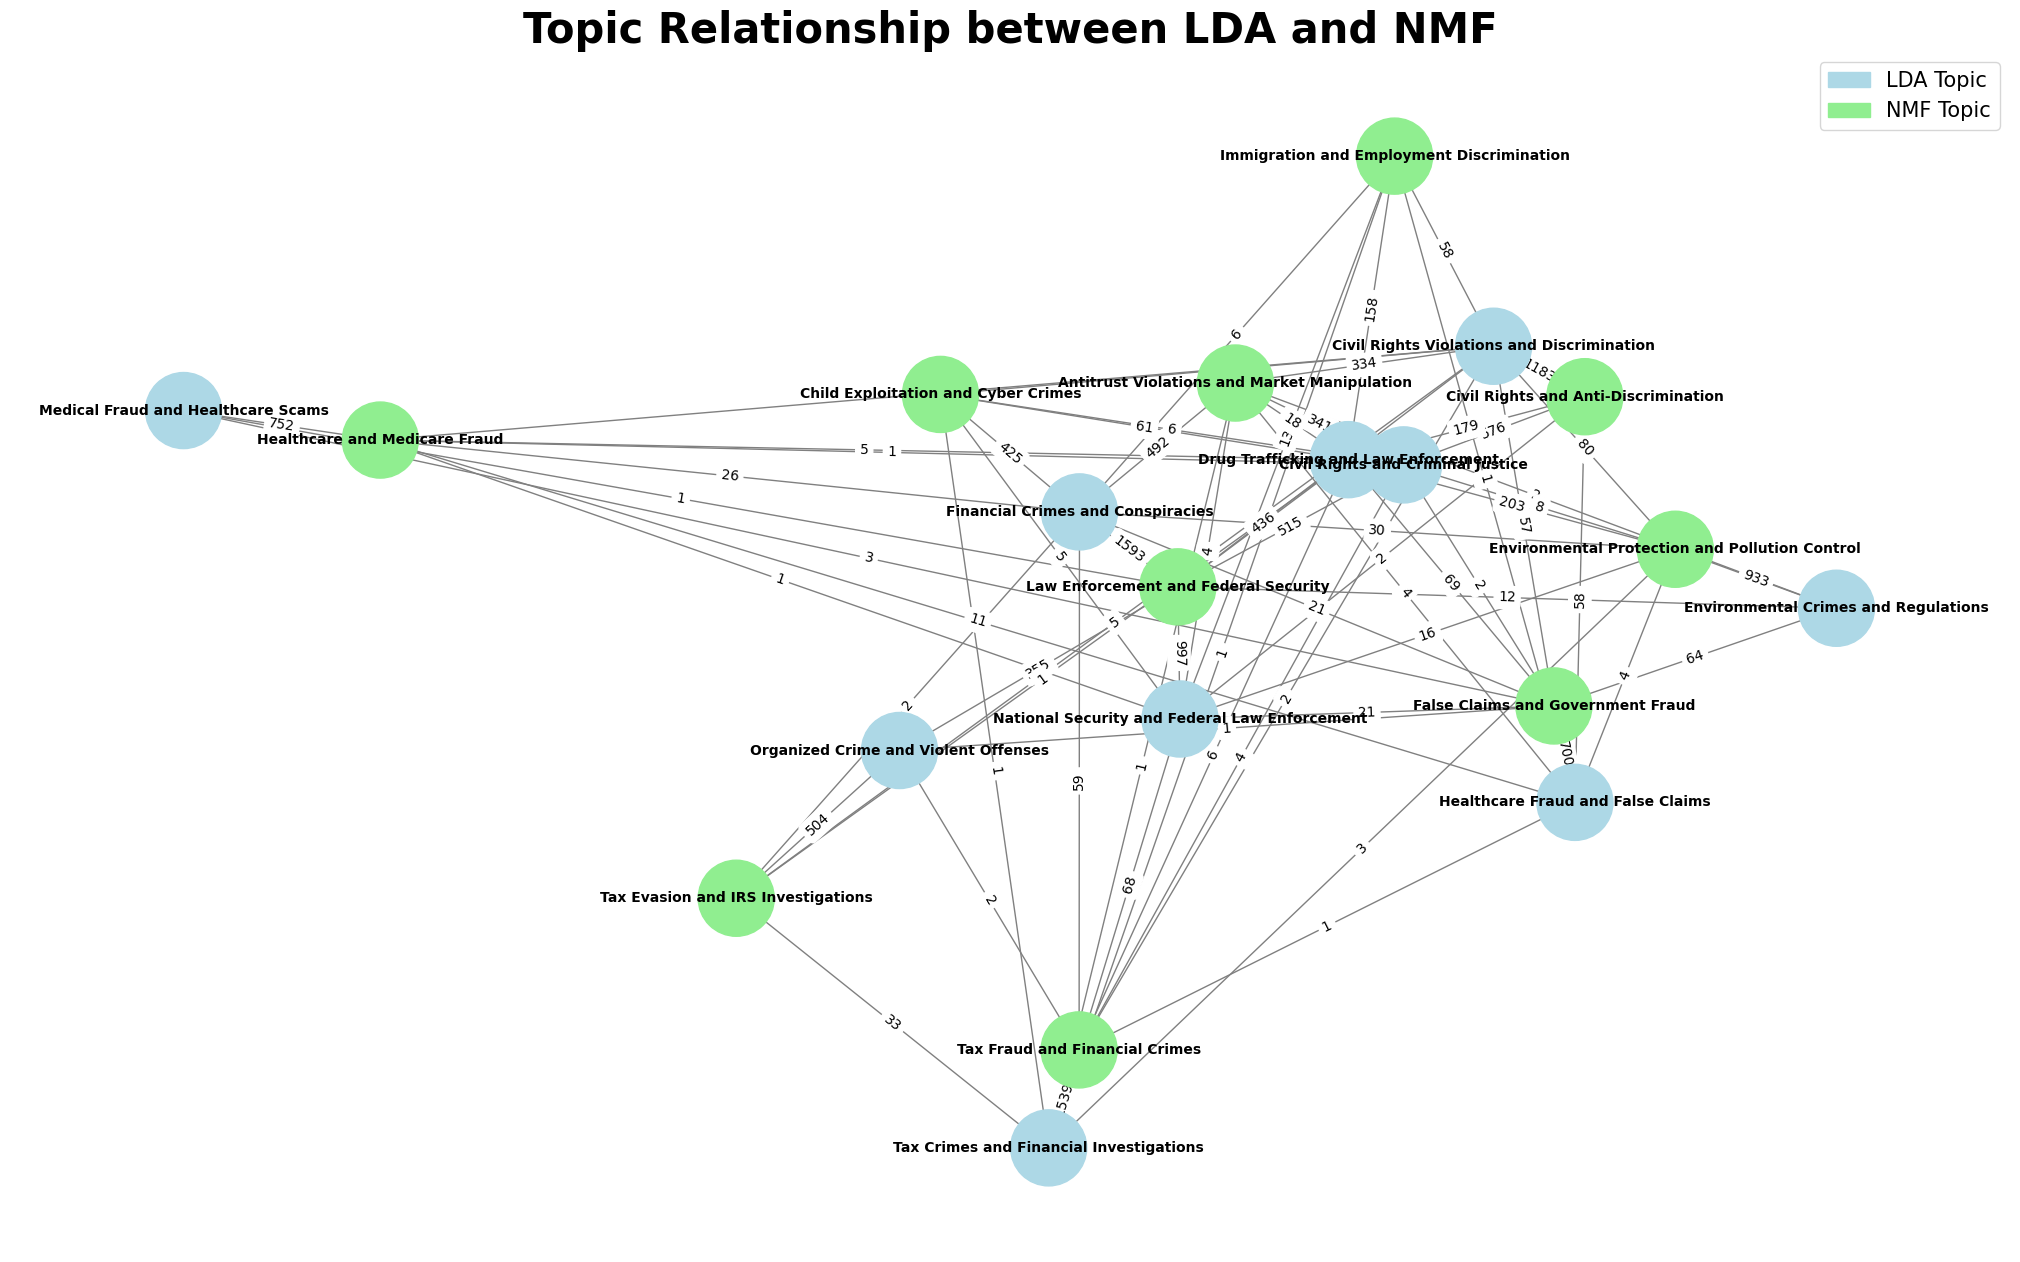

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx



G = nx.Graph()


lda_color = 'lightblue'  
nmf_color = 'lightgreen'  


for lda_topic in df2['Topic_name_LDA'].unique():
    G.add_node(lda_topic, label=lda_topic, color=lda_color)

for nmf_topic in df2['Topic_name_NMF'].unique():
    G.add_node(nmf_topic, label=nmf_topic, color=nmf_color)


for _, row in topic_relations.iterrows():
    G.add_edge(row['Topic_name_LDA'], row['Topic_name_NMF'], weight=row['Count'])


pos = nx.spring_layout(G, seed=42)


node_colors = [G.nodes[node]['color'] for node in G.nodes]


plt.figure(figsize=(20, 12))
nx.draw(G, pos, with_labels=True, node_size=3000, font_size=10, font_weight='bold', node_color=node_colors, edge_color='gray')


edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)


import matplotlib.patches as mpatches


lda_patch = mpatches.Patch(color=lda_color, label="LDA Topic")
nmf_patch = mpatches.Patch(color=nmf_color, label="NMF Topic")


plt.legend(handles=[lda_patch, nmf_patch], loc='upper right', fontsize=15)


plt.title("Topic Relationship between LDA and NMF", fontsize=30, fontweight='bold')

plt.show()


In [56]:
df2['Topic_name_LDA'].unique()

array(['National Security and Federal Law Enforcement',
       'Environmental Crimes and Regulations',
       'Organized Crime and Violent Offenses',
       'Civil Rights and Criminal Justice',
       'Healthcare Fraud and False Claims',
       'Financial Crimes and Conspiracies',
       'Drug Trafficking and Law Enforcement',
       'Medical Fraud and Healthcare Scams',
       'Tax Crimes and Financial Investigations',
       'Civil Rights Violations and Discrimination'], dtype=object)

In [58]:
df2['Topic_name_NMF'].unique()

array(['Law Enforcement and Federal Security',
       'Environmental Protection and Pollution Control',
       'Civil Rights and Anti-Discrimination',
       'False Claims and Government Fraud',
       'Child Exploitation and Cyber Crimes',
       'Tax Fraud and Financial Crimes', 'Healthcare and Medicare Fraud',
       'Antitrust Violations and Market Manipulation',
       'Tax Evasion and IRS Investigations',
       'Immigration and Employment Discrimination'], dtype=object)

Testing for a manual text - which group would be according to both methods?

In [85]:
news_dict = {
    1: {
        "news": "Federal authorities have recently conducted a significant operation targeting criminal organizations engaged in illegal trafficking of firearms. The operation spanned multiple states and included arrests of high-ranking individuals linked to notorious gangs. Investigators revealed that the firearms were being sold to individuals connected with violent crimes, posing a severe threat to national security. This nationwide crackdown is seen as a critical step in curbing the illegal gun trade, and experts believe it will have a long-term impact on reducing violent crime in urban areas.",
        "summary": "Firearms trafficking, criminal organizations, national security"
    },
    2: {
        "news": "In a significant move to protect the environment, the U.S. government has introduced new regulations aimed at reducing industrial pollution and controlling plastic waste. The new guidelines require industries to adopt more sustainable practices, including reducing greenhouse gas emissions and minimizing single-use plastics. The law also mandates stricter penalties for companies found violating these environmental standards. Environmental organizations have lauded the initiative, arguing that it’s a much-needed step in addressing climate change and preserving ecosystems for future generations.",
        "summary": "Industrial pollution, greenhouse gases, environmental regulations"
    },
    3: {
        "news": "Civil rights groups are urging the U.S. Congress to pass comprehensive reforms addressing systemic discrimination in housing, employment, and education. Activists have gathered data showing that minority groups, especially Black and Hispanic communities, continue to face disparities in job opportunities and housing. The proposed reforms aim to enforce stricter anti-discrimination policies, increase diversity in workplaces, and provide equal access to public services. Lawmakers are expected to debate the bill soon, and if passed, it could result in groundbreaking changes to civil rights laws.",
        "summary": "Civil rights, discrimination, anti-discrimination reforms"
    },
    4: {
        "news": "A whistleblower within a major government contracting company has revealed a large-scale fraud scheme in which millions of taxpayer dollars were misused. According to the whistleblower’s testimony, government contractors submitted false invoices for non-existent or incomplete projects, and several officials allegedly turned a blind eye to the fraud. The revelation has prompted an extensive investigation by federal authorities into both the private companies involved and the government agencies that may have overlooked the irregularities. If proven, this scandal could lead to significant legal and financial consequences.",
        "summary": "Whistleblower, government fraud, taxpayer money"
    },
    5: {
        "news": "Authorities have recently exposed a massive cyber-crime operation that was exploiting vulnerable children online. The operation involved a network of individuals who used encrypted messaging apps to distribute child exploitation material and arrange illicit meetings with minors. The investigation, led by federal and state law enforcement, has already resulted in multiple arrests. Officials are now working to track down other members of the network and provide support to the victims. This operation marks one of the largest efforts in combating online child exploitation in recent years.",
        "summary": "Cyber-crime, child exploitation, online abuse"
    },
    6: {
        "news": "The Internal Revenue Service (IRS) has launched a full-scale investigation into a sophisticated tax evasion scheme involving high-net-worth individuals who hid their income in offshore accounts. The operation is part of a broader crackdown on tax fraud, which has seen the IRS increase scrutiny on international financial transactions. The scheme is believed to involve several international banks and law firms that helped their clients evade taxes by moving large sums of money to tax havens. Investigators are now tracing the financial flows to uncover how much revenue was lost.",
        "summary": "IRS investigation, tax evasion, offshore accounts"
    },
    7: {
        "news": "A healthcare company is under investigation for submitting false Medicare claims, allegedly billing for medical procedures that were never performed. Whistleblowers within the company came forward with evidence showing that staff members were instructed to submit fraudulent claims to maximize profits. The company has denied the accusations, but authorities are reviewing internal documents and patient records. If the fraud is proven, the company could face heavy fines, and several individuals involved may be prosecuted for healthcare fraud.",
        "summary": "Healthcare fraud, Medicare claims, false billing"
    },
    8: {
        "news": "A new investigation has uncovered widespread price-fixing practices within the pharmaceutical industry. According to federal officials, several pharmaceutical companies secretly coordinated to inflate the prices of essential medications, including life-saving drugs. The companies allegedly met in private meetings to set prices and ensure that competitors adhered to the agreed-upon rates. The investigation, which has already led to a series of subpoenas and fines, is expected to result in more penalties for the companies involved. Regulators are now focused on holding the industry accountable for these illegal activities.",
        "summary": "Price-fixing, pharmaceutical industry, drug prices"
    },
    9: {
        "news": "A tax evasion ring has been uncovered involving several high-profile business owners who used offshore shell companies to conceal their income and assets. The scheme was exposed through a tip-off from an insider and has prompted a full investigation by the IRS. The businesses involved allegedly evaded millions in taxes by shifting profits to countries with lax tax regulations. The authorities are working to track down the individuals responsible for organizing the network and to ensure that they face legal consequences for their actions.",
        "summary": "Tax evasion, offshore accounts, business fraud"
    },
    10: {
        "news": "A large corporation is facing a class-action lawsuit from immigrant workers who allege they were subjected to wage discrimination and denial of benefits. According to the workers, they were paid significantly less than their native-born colleagues, despite performing the same tasks. The lawsuit, filed in federal court, is seeking compensation for the workers and demands that the company change its pay practices. Civil rights lawyers argue that this case could set a precedent for similar lawsuits across the country, addressing wage disparities in the workplace.",
        "summary": "Immigrant workers, wage discrimination, class-action lawsuit"
    },
    11: {
        "news": "The FBI has initiated a wide-ranging investigation into several Mexican drug cartels involved in trafficking large quantities of narcotics across the U.S.-Mexico border. The cartels are believed to be responsible for the distribution of cocaine, heroin, and methamphetamines in several states. Federal agents, in collaboration with local law enforcement, have seized shipments of drugs worth millions of dollars. Authorities are also looking into money laundering activities associated with the cartels. The operation is part of a broader effort to combat the growing drug epidemic in the U.S.",
        "summary": "Drug trafficking, FBI investigation, Mexican cartels"
    },
    12: {
        "news": "Environmental protection agencies have welcomed new measures introduced by the federal government aimed at tackling the climate crisis. The measures include stricter emissions standards for factories and power plants, as well as incentives for companies that invest in renewable energy sources. The government has also pledged to increase funding for conservation programs. While environmentalists have praised the move, critics argue that the regulations may harm certain industries and lead to job losses. The debate over these measures is expected to continue throughout the year.",
        "summary": "Environmental protection, climate crisis, emissions standards"
    },
    13: {
        "news": "A groundbreaking bill aimed at protecting LGBTQ+ rights in the workplace has gained significant support in Congress. The bill seeks to prevent discrimination based on sexual orientation and gender identity, ensuring that LGBTQ+ individuals are treated fairly in hiring, promotions, and pay. Supporters of the bill argue that it is long overdue, while opponents claim that it could lead to legal challenges for businesses. The bill is expected to be debated in the coming weeks, and its passage could represent a major victory for LGBTQ+ advocacy groups.",
        "summary": "LGBTQ+ rights, workplace discrimination, new bill"
    },
    14: {
        "news": "Federal authorities have uncovered a massive fraud scheme involving government contractors who overcharged for services and submitted fake invoices. The fraud, which has affected millions of dollars in taxpayer money, was discovered during a routine audit. Several contractors have been arrested, and investigators are now examining the involvement of government employees who may have facilitated the fraudulent activities. The authorities are determined to recover the stolen funds and prosecute those responsible for the corruption.",
        "summary": "Government contractors, fraud scheme, taxpayer money"
    },
    15: {
        "news": "A national investigation has uncovered a disturbing trend of online exploitation of minors. The operation targeted a group of individuals who used encrypted messaging platforms to share illicit content and arrange meetings with underage victims. Authorities have arrested several perpetrators, and investigations are ongoing to identify additional suspects. The case has drawn widespread attention to the growing issue of online child exploitation and the need for stronger cybersecurity measures to protect children from online predators.",
        "summary": "Child exploitation, online crime, law enforcement"
    },
    16: {
        "news": "The Securities and Exchange Commission (SEC) has filed charges against several banks for their involvement in facilitating fraudulent tax schemes. According to the SEC’s investigation, the banks helped clients conceal income through offshore accounts and shell companies. The fraud scheme is estimated to have cost the U.S. government billions in lost tax revenue. The SEC is seeking to impose heavy fines on the banks involved and is working with the IRS to identify individuals who benefited from the fraudulent activities.",
        "summary": "SEC charges, tax fraud, offshore accounts"
    },
    17: {
        "news": "A prominent healthcare provider is facing legal action for defrauding Medicare by submitting false claims for medical services that were never rendered. The fraudulent billing was uncovered during an audit of the company’s financial records. The healthcare provider has denied any wrongdoing, but investigations are ongoing. If the company is found guilty, it could face significant fines and be barred from participating in federal healthcare programs.",
        "summary": "Medicare fraud, healthcare provider, false claims"
    },
    18: {
        "news": "The Department of Justice has filed a lawsuit against a major tech company for violating antitrust laws. The company is accused of using its market dominance to suppress competition and inflate prices. The lawsuit claims that the company engaged in unfair business practices that harmed consumers and stifled innovation. If successful, the lawsuit could lead to significant changes in how the tech industry operates, including stricter regulations on large corporations.",
        "summary": "Antitrust violations, tech company, market dominance"
    },
    19: {
        "news": "A high-profile tax evasion case has come to light involving wealthy business owners who used offshore trusts to hide millions of dollars in income. The IRS has launched an extensive investigation into the individuals and companies involved, and several subpoenas have already been issued. If convicted, the individuals involved could face heavy fines and jail time. The case is expected to highlight weaknesses in the U.S. tax system and lead to reforms aimed at closing loopholes for the wealthy.",
        "summary": "Tax evasion, offshore trusts, IRS investigation"
    },
    20: {
        "news": "A major corporation is facing legal challenges after a series of reports revealed that it had discriminated against immigrant workers. The workers claim that they were given lower wages, poor working conditions, and limited career advancement opportunities. The lawsuit, which has been filed in federal court, seeks compensation for the workers and a change in the company’s labor practices. The case has drawn attention to the ongoing issue of immigrant labor exploitation in the U.S. economy.",
        "summary": "Immigrant workers, discrimination, labor lawsuit"
    }
}


In [86]:

# Convert the dictionary into a pandas DataFrame
df_news = pd.DataFrame.from_dict(news_dict, orient='index')

# Display the dataframe











In [87]:
df_news.head(20)

,news,summary
1,Federal authorities have recently conducted a ...,"Firearms trafficking, criminal organizations, ..."
2,In a significant move to protect the environme...,"Industrial pollution, greenhouse gases, enviro..."
3,Civil rights groups are urging the U.S. Congre...,"Civil rights, discrimination, anti-discriminat..."
4,A whistleblower within a major government cont...,"Whistleblower, government fraud, taxpayer money"
5,Authorities have recently exposed a massive cy...,"Cyber-crime, child exploitation, online abuse"
6,The Internal Revenue Service (IRS) has launche...,"IRS investigation, tax evasion, offshore accounts"
7,A healthcare company is under investigation fo...,"Healthcare fraud, Medicare claims, false billing"
8,A new investigation has uncovered widespread p...,"Price-fixing, pharmaceutical industry, drug pr..."
9,A tax evasion ring has been uncovered involvin...,"Tax evasion, offshore accounts, business fraud"
10,A large corporation is facing a class-action l...,"Immigrant workers, wage discrimination, class-..."


In [88]:
new_dtm = cv.transform(df_news['news'])

In [89]:
topic_distribution = LDA.transform(new_dtm)

In [90]:
df_news['Topic_LDA'] = topic_distribution.argmax(axis=1)

In [91]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 1 to 20
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   news       20 non-null     object
 1   summary    20 non-null     object
 2   Topic_LDA  20 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 640.0+ bytes


In [92]:
df_news

,news,summary,Topic_LDA
1,Federal authorities have recently conducted a ...,"Firearms trafficking, criminal organizations, ...",7
2,In a significant move to protect the environme...,"Industrial pollution, greenhouse gases, enviro...",4
3,Civil rights groups are urging the U.S. Congre...,"Civil rights, discrimination, anti-discriminat...",8
4,A whistleblower within a major government cont...,"Whistleblower, government fraud, taxpayer money",1
5,Authorities have recently exposed a massive cy...,"Cyber-crime, child exploitation, online abuse",1
6,The Internal Revenue Service (IRS) has launche...,"IRS investigation, tax evasion, offshore accounts",5
7,A healthcare company is under investigation fo...,"Healthcare fraud, Medicare claims, false billing",3
8,A new investigation has uncovered widespread p...,"Price-fixing, pharmaceutical industry, drug pr...",2
9,A tax evasion ring has been uncovered involvin...,"Tax evasion, offshore accounts, business fraud",5
10,A large corporation is facing a class-action l...,"Immigrant workers, wage discrimination, class-...",8


In [93]:
df_news = df_news.merge(df2[['Topic_LDA', 'Topic_name_LDA']].drop_duplicates(), on='Topic_LDA', how='left')




In [94]:
df_news

,news,summary,Topic_LDA,Topic_name_LDA
0,Federal authorities have recently conducted a ...,"Firearms trafficking, criminal organizations, ...",7,Drug Trafficking and Law Enforcement
1,In a significant move to protect the environme...,"Industrial pollution, greenhouse gases, enviro...",4,Environmental Crimes and Regulations
2,Civil rights groups are urging the U.S. Congre...,"Civil rights, discrimination, anti-discriminat...",8,Civil Rights Violations and Discrimination
3,A whistleblower within a major government cont...,"Whistleblower, government fraud, taxpayer money",1,Financial Crimes and Conspiracies
4,Authorities have recently exposed a massive cy...,"Cyber-crime, child exploitation, online abuse",1,Financial Crimes and Conspiracies
5,The Internal Revenue Service (IRS) has launche...,"IRS investigation, tax evasion, offshore accounts",5,Tax Crimes and Financial Investigations
6,A healthcare company is under investigation fo...,"Healthcare fraud, Medicare claims, false billing",3,Healthcare Fraud and False Claims
7,A new investigation has uncovered widespread p...,"Price-fixing, pharmaceutical industry, drug pr...",2,Civil Rights and Criminal Justice
8,A tax evasion ring has been uncovered involvin...,"Tax evasion, offshore accounts, business fraud",5,Tax Crimes and Financial Investigations
9,A large corporation is facing a class-action l...,"Immigrant workers, wage discrimination, class-...",8,Civil Rights Violations and Discrimination


In [95]:
new_dtm = tfidf.transform(df_news['news'])

In [96]:
topic_distribution = nmf_model.transform(new_dtm)

In [97]:
df_news['Topic_NMF'] = topic_distribution.argmax(axis=1)

In [98]:
df2

,contents,Topic_LDA,Topic_NMF,Topic_name_LDA,Topic_name_NMF
0,"PORTLAND, Oregon. – Mohamed Osman Mohamud, 23,...",0,0,National Security and Federal Law Enforcement,Law Enforcement and Federal Security
1,WASHINGTON – North Carolina’s Waccamaw River...,4,9,Environmental Crimes and Regulations,Environmental Protection and Pollution Control
2,BOSTON– A $1-million settlement has been...,4,9,Environmental Crimes and Regulations,Environmental Protection and Pollution Control
3,WASHINGTON—A federal grand jury in Las Vegas...,4,9,Environmental Crimes and Regulations,Environmental Protection and Pollution Control
4,"The U.S. Department of Justice, the U.S. Envir...",4,9,Environmental Crimes and Regulations,Environmental Protection and Pollution Control
...,...,...,...,...,...
13082,The Department of Justice and the U.S. Environ...,4,9,Environmental Crimes and Regulations,Environmental Protection and Pollution Control
13083,The Justice Department announced that Zarein...,0,0,National Security and Federal Law Enforcement,Law Enforcement and Federal Security
13084,Subsidiary Agrees to Plead Guilty to Violating...,1,9,Financial Crimes and Conspiracies,Environmental Protection and Pollution Control
13085,ZTE Corporation has agreed to enter a guilty p...,4,0,Environmental Crimes and Regulations,Law Enforcement and Federal Security


In [99]:
df_news = df_news.merge(df2[['Topic_NMF', 'Topic_name_NMF']].drop_duplicates(), on='Topic_NMF', how='left')

In [100]:
df_news

,news,summary,Topic_LDA,Topic_name_LDA,Topic_NMF,Topic_name_NMF
0,Federal authorities have recently conducted a ...,"Firearms trafficking, criminal organizations, ...",7,Drug Trafficking and Law Enforcement,0,Law Enforcement and Federal Security
1,In a significant move to protect the environme...,"Industrial pollution, greenhouse gases, enviro...",4,Environmental Crimes and Regulations,9,Environmental Protection and Pollution Control
2,Civil rights groups are urging the U.S. Congre...,"Civil rights, discrimination, anti-discriminat...",8,Civil Rights Violations and Discrimination,3,Civil Rights and Anti-Discrimination
3,A whistleblower within a major government cont...,"Whistleblower, government fraud, taxpayer money",1,Financial Crimes and Conspiracies,5,False Claims and Government Fraud
4,Authorities have recently exposed a massive cy...,"Cyber-crime, child exploitation, online abuse",1,Financial Crimes and Conspiracies,4,Child Exploitation and Cyber Crimes
5,The Internal Revenue Service (IRS) has launche...,"IRS investigation, tax evasion, offshore accounts",5,Tax Crimes and Financial Investigations,1,Tax Fraud and Financial Crimes
6,A healthcare company is under investigation fo...,"Healthcare fraud, Medicare claims, false billing",3,Healthcare Fraud and False Claims,2,Healthcare and Medicare Fraud
7,A new investigation has uncovered widespread p...,"Price-fixing, pharmaceutical industry, drug pr...",2,Civil Rights and Criminal Justice,6,Antitrust Violations and Market Manipulation
8,A tax evasion ring has been uncovered involvin...,"Tax evasion, offshore accounts, business fraud",5,Tax Crimes and Financial Investigations,1,Tax Fraud and Financial Crimes
9,A large corporation is facing a class-action l...,"Immigrant workers, wage discrimination, class-...",8,Civil Rights Violations and Discrimination,8,Immigration and Employment Discrimination
